In [32]:
from keras.datasets import reuters

In [33]:
(train_data,train_labels),(test_data,test_labels) = reuters.load_data(num_words = 10000)

In [34]:
train_data.ndim

1

In [35]:
test_labels

array([ 3, 10,  1, ...,  3,  3, 24])

In [36]:
word_index = reuters.get_word_index() 

In [37]:
reverse_word_index = {}

for value,key in word_index.items():
    reverse_word_index[key] = value

reverse_word_index[3]

'to'

In [38]:
#vectorizing the data
import numpy as np
def vectorize(sequence,dimension = 10000):
    results = np.zeros((len(sequence),dimension))
    for i,j in enumerate(sequence):
        results[i,j] = 1 #certain index are set to 1 like before and the dimension of the 2d tensor is len*10000
    return results

In [39]:
x_train = vectorize(train_data)
x_test = vectorize(test_data)

In [40]:
x_train.ndim

2

# Catagorical encoding the test_label and train_label or one hot encoding

In [41]:
import numpy as np
def to_one_hot(labels,dimension = 46):
    results = np.zeros((len(labels),dimension))
    for i,j in enumerate(labels):
        results[i,j] = 1
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [42]:
one_hot_test_labels[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

# The number of hidden units to use

### previously we used 16 hidden units to classify between two things good or bad, but now we need more than that, precisely 46 label to classify. So using only 16 hidden unit would only result in information loss. Thus we would want to use more hidden units so that we would not lose any information and learn betterly from the previous hidden units to the next layer. So we would use 64 hidden units

In [44]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Dense(64,activation = 'relu',input_shape = (10000,)))
model.add(layers.Dense(64,activation = 'relu'))
model.add(layers.Dense(46,activation = 'softmax'))

### The network uses a Dense layer of the size 46 in the output, this means that we end the network with a 46 dimensional vector and each entry in the vector will encode a different class in our classification problem

### Another thing to notice is use of softmax activation that would give a probabilty distribution across 46 different classes that would sum to 1. The unit with the highest probabilty will give us the result of the classification task

## We use catagorical cross entropy as our loss function 

In [45]:
model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy']
)

In [47]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

## Training the model: 

In [48]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val,y_val))


Instructions for updating:
Use tf.cast instead.
Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 223us/step - loss: 2.4997 - acc: 0.4899 - val_loss: 1.6813 - val_acc: 0.6480
Epoch 2/20
7982/7982 [==============================] - 1s 144us/step - loss: 1.3915 - acc: 0.7038 - val_loss: 1.2790 - val_acc: 0.7190
Epoch 3/20
7982/7982 [==============================] - 1s 144us/step - loss: 1.0487 - acc: 0.7699 - val_loss: 1.1181 - val_acc: 0.7610
Epoch 4/20
7982/7982 [==============================] - 1s 144us/step - loss: 0.8246 - acc: 0.8282 - val_loss: 1.0217 - val_acc: 0.7760
Epoch 5/20
7982/7982 [==============================] - 1s 161us/step - loss: 0.6599 - acc: 0.8637 - val_loss: 0.9688 - val_acc: 0.7970
Epoch 6/20
7982/7982 [==============================] - 1s 157us/step - loss: 0.5254 - acc: 0.8931 - val_loss: 0.9200 - val_acc: 0.8090
Epoch 7/20
7982/7982 [==============================] - 1s 157us/step - loss: 0.4291 - a

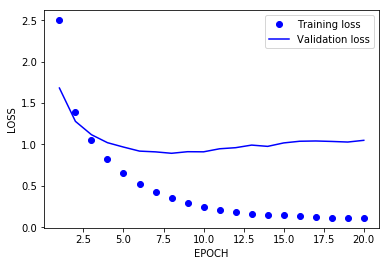

In [50]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epoch = range(1,len(loss_values)+1)

plt.plot(epoch,loss_values,'bo',label = 'Training loss')
plt.plot(epoch,val_loss_values,'b',label = 'Validation loss')
plt.xlabel('EPOCH')
plt.ylabel('LOSS')
plt.legend()

plt.show()


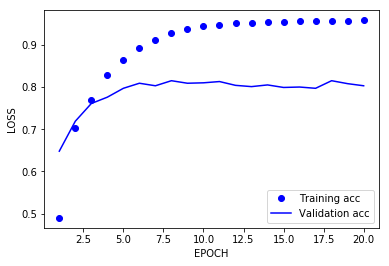

In [51]:
import matplotlib.pyplot as plt
history_dict = history.history
acc = history_dict['acc']
val_acc = history_dict['val_acc']

epoch = range(1,len(loss_values)+1)

plt.plot(epoch,acc,'bo',label = 'Training acc')
plt.plot(epoch,val_acc,'b',label = 'Validation acc')
plt.xlabel('EPOCH')
plt.ylabel('LOSS')
plt.legend()

plt.show()

### The model starts to overfit the data after 8 or 9 epochs, so we can train for lesser epochs and see what happens

In [52]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Dense(64,activation = 'relu',input_shape = (10000,)))
model.add(layers.Dense(64,activation = 'relu'))
model.add(layers.Dense(46,activation = 'softmax'))

model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy']
)

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=9,
                   batch_size=512,
                   validation_data=(x_val,y_val))


Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 163us/step - loss: 2.5398 - acc: 0.5226 - val_loss: 1.6733 - val_acc: 0.6570
Epoch 2/9
7982/7982 [==============================] - 1s 115us/step - loss: 1.3712 - acc: 0.7121 - val_loss: 1.2758 - val_acc: 0.7210
Epoch 3/9
7982/7982 [==============================] - 1s 169us/step - loss: 1.0136 - acc: 0.7781 - val_loss: 1.1303 - val_acc: 0.7530
Epoch 4/9
7982/7982 [==============================] - 1s 137us/step - loss: 0.7976 - acc: 0.8251 - val_loss: 1.0539 - val_acc: 0.7590
Epoch 5/9
7982/7982 [==============================] - 1s 128us/step - loss: 0.6393 - acc: 0.8624 - val_loss: 0.9754 - val_acc: 0.7920
Epoch 6/9
7982/7982 [==============================] - 1s 149us/step - loss: 0.5124 - acc: 0.8921 - val_loss: 0.9102 - val_acc: 0.8140
Epoch 7/9
7982/7982 [==============================] - 1s 152us/step - loss: 0.4124 - acc: 0.9137 - val_loss: 0.8932 - val_acc: 0.8210
Epoch 8

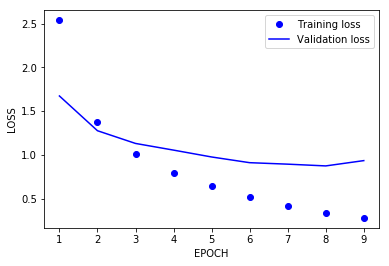

In [53]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epoch = range(1,len(loss_values)+1)

plt.plot(epoch,loss_values,'bo',label = 'Training loss')
plt.plot(epoch,val_loss_values,'b',label = 'Validation loss')
plt.xlabel('EPOCH')
plt.ylabel('LOSS')
plt.legend()

plt.show()

## so we have a significantly better result

In [54]:
results = model.evaluate(x_test,one_hot_test_labels)

2246/2246 [==============================] - 0s 133us/step


In [55]:
results

[1.0224982713442876, 0.7756010686194165]